## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)

    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                4160      
_________________________________________________________________
output (Dense)               

50000/50000 [==============================] - 28s 556us/step - loss: 1.4422 - accuracy: 0.4865 - val_loss: 1.5474 - val_accuracy: 0.4488
Epoch 47/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.4492 - accuracy: 0.4843 - val_loss: 1.5219 - val_accuracy: 0.4646
Epoch 48/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.4398 - accuracy: 0.4873 - val_loss: 1.5422 - val_accuracy: 0.4632
Epoch 49/50
50000/50000 [==============================] - 20s 401us/step - loss: 1.4555 - accuracy: 0.4846 - val_loss: 1.5372 - val_accuracy: 0.4579
Epoch 50/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.4451 - accuracy: 0.4894 - val_loss: 1.5362 - val_accuracy: 0.4588
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________

50000/50000 [==============================] - 16s 313us/step - loss: 0.7883 - accuracy: 0.7181 - val_loss: 1.5918 - val_accuracy: 0.5258
Epoch 42/50
50000/50000 [==============================] - 18s 354us/step - loss: 0.7641 - accuracy: 0.7251 - val_loss: 1.6392 - val_accuracy: 0.5151
Epoch 43/50
50000/50000 [==============================] - 16s 313us/step - loss: 0.7593 - accuracy: 0.7282 - val_loss: 1.6790 - val_accuracy: 0.5117
Epoch 44/50
50000/50000 [==============================] - 20s 404us/step - loss: 0.7507 - accuracy: 0.7307 - val_loss: 1.6618 - val_accuracy: 0.5145
Epoch 45/50
50000/50000 [==============================] - 47s 945us/step - loss: 0.7299 - accuracy: 0.7384 - val_loss: 1.7295 - val_accuracy: 0.5123
Epoch 46/50
50000/50000 [==============================] - 27s 540us/step - loss: 0.7260 - accuracy: 0.7395 - val_loss: 1.6849 - val_accuracy: 0.5191
Epoch 47/50
50000/50000 [==============================] - 21s 416us/step - loss: 0.7163 - accuracy: 0.7414 - va

50000/50000 [==============================] - 8s 157us/step - loss: 0.9888 - accuracy: 0.6539 - val_loss: 1.4016 - val_accuracy: 0.5156
Epoch 37/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.9786 - accuracy: 0.6582 - val_loss: 1.3360 - val_accuracy: 0.5363
Epoch 38/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.9686 - accuracy: 0.6609 - val_loss: 1.3497 - val_accuracy: 0.5361
Epoch 39/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.9546 - accuracy: 0.6643 - val_loss: 1.3762 - val_accuracy: 0.5312
Epoch 40/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.9474 - accuracy: 0.6687 - val_loss: 1.3340 - val_accuracy: 0.5407
Epoch 41/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.9251 - accuracy: 0.6774 - val_loss: 1.3656 - val_accuracy: 0.5330
Epoch 42/50
50000/50000 [==============================] - 8s 157us/step - loss: 0.9237 - accuracy: 0.6757 - val_loss:

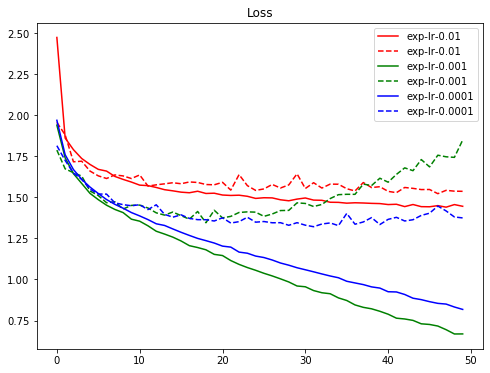

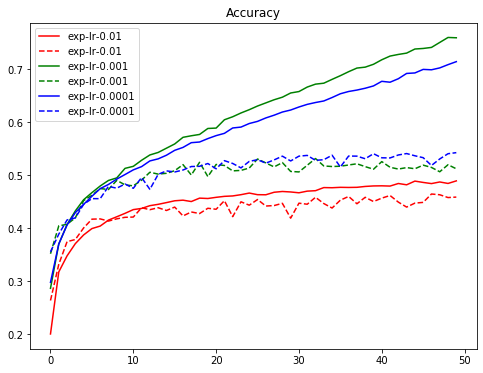

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()